In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AffinityPropagation

In [2]:
# Load the full grocery customer dataset and take a random sample of 100 instances
data = pd.read_csv('customer_personality.csv').sample(500, random_state=123)

In [3]:
# Use StandardScaler() to standardize input features
X = data[['Fruits', 'Meats']]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [4]:
# Apply affinity propagation clustering
affinity = AffinityPropagation()
affinity = affinity.fit(X)

/nix/store/8wywxcyl55621dl73680z2lyjlzi5a3n-python3-3.10.9-env/lib/python3.10/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [5]:
# Print the cluster labels and core point indices
print('Cluster centers:', affinity.cluster_centers_)
print('Cluster labels:', affinity.labels_)
print('Number of clusters:', len(affinity.cluster_centers_))

Cluster centers: [[-0.56961102 -0.69007279]
 [-0.69148944 -0.69007279]
 [-0.69148944 -0.7026287 ]
 [-0.00897025  2.87580553]
 [-0.5939867  -0.60218142]
 [-0.44773259  0.07583769]
 [-0.66711376 -0.69007279]
 [-0.66711376 -0.69007279]
 [-0.69148944 -0.69007279]
 [-0.66711376 -0.69007279]
 [-0.66711376 -0.60218142]
 [-0.69148944 -0.69007279]
 [-0.66711376 -0.67751688]
 [-0.64273807 -0.69007279]
 [-0.64273807 -0.60218142]
 [-0.44773259 -0.35106323]
 [-0.64273807 -0.57706961]
 [-0.69148944 -0.61473733]
 [-0.69148944 -0.57706961]
 [-0.64273807 -0.67751688]
 [-0.69148944 -0.69007279]
 [-0.69148944 -0.7026287 ]
 [-0.61836239 -0.7026287 ]
 [-0.64273807 -0.7026287 ]
 [-0.69148944 -0.7026287 ]
 [-0.66711376 -0.65240506]
 [-0.08209731  0.43995907]
 [-0.66711376 -0.7026287 ]
 [ 4.15927195  0.49018271]
 [-0.56961102 -0.53940188]
 [-0.61836239 -0.7026287 ]
 [-0.37460553 -0.63984915]
 [-0.66711376 -0.57706961]
 [-0.5939867  -0.7026287 ]
 [-0.61836239 -0.69007279]
 [-0.69148944 -0.57706961]
 [-0.667113

In [6]:
# Add the cluster labels to the dataset as strings
data['clusters'] = affinity.labels_.astype(str)

# Sort by cluster label (for plotting purposes)
data.sort_values(by='clusters', inplace=True)

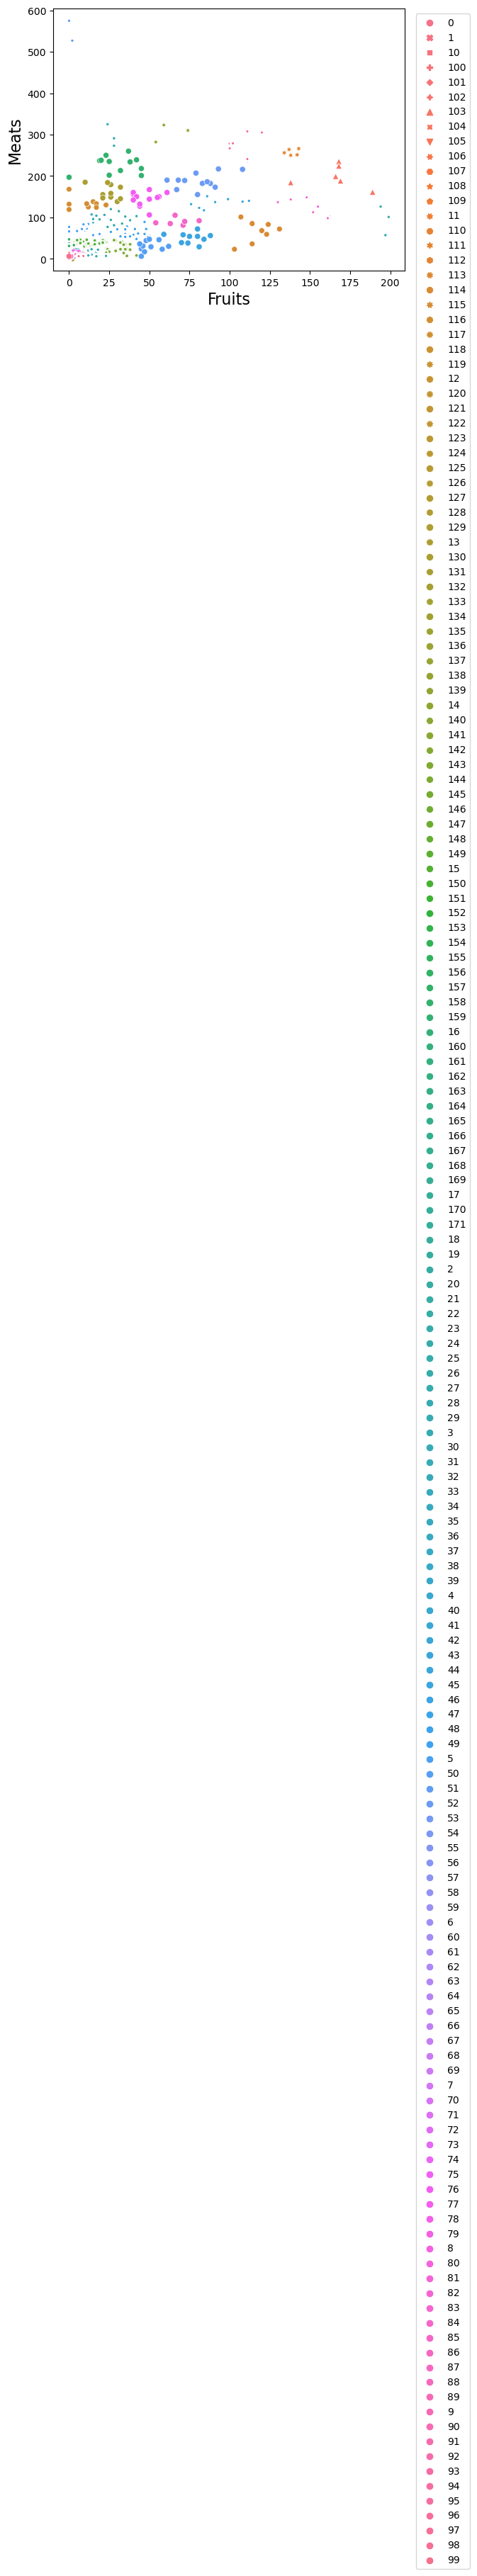

In [7]:
# Plot clusters on the original data
p = sns.scatterplot(data=data, x='Fruits',
                    y='Meats', hue='clusters',
                    style='clusters')
p.set_xlabel('Fruits', fontsize=16)
p.set_ylabel('Meats', fontsize=16)
p.legend(title='Affinity')
p.legend(bbox_to_anchor=(1.2, 1))

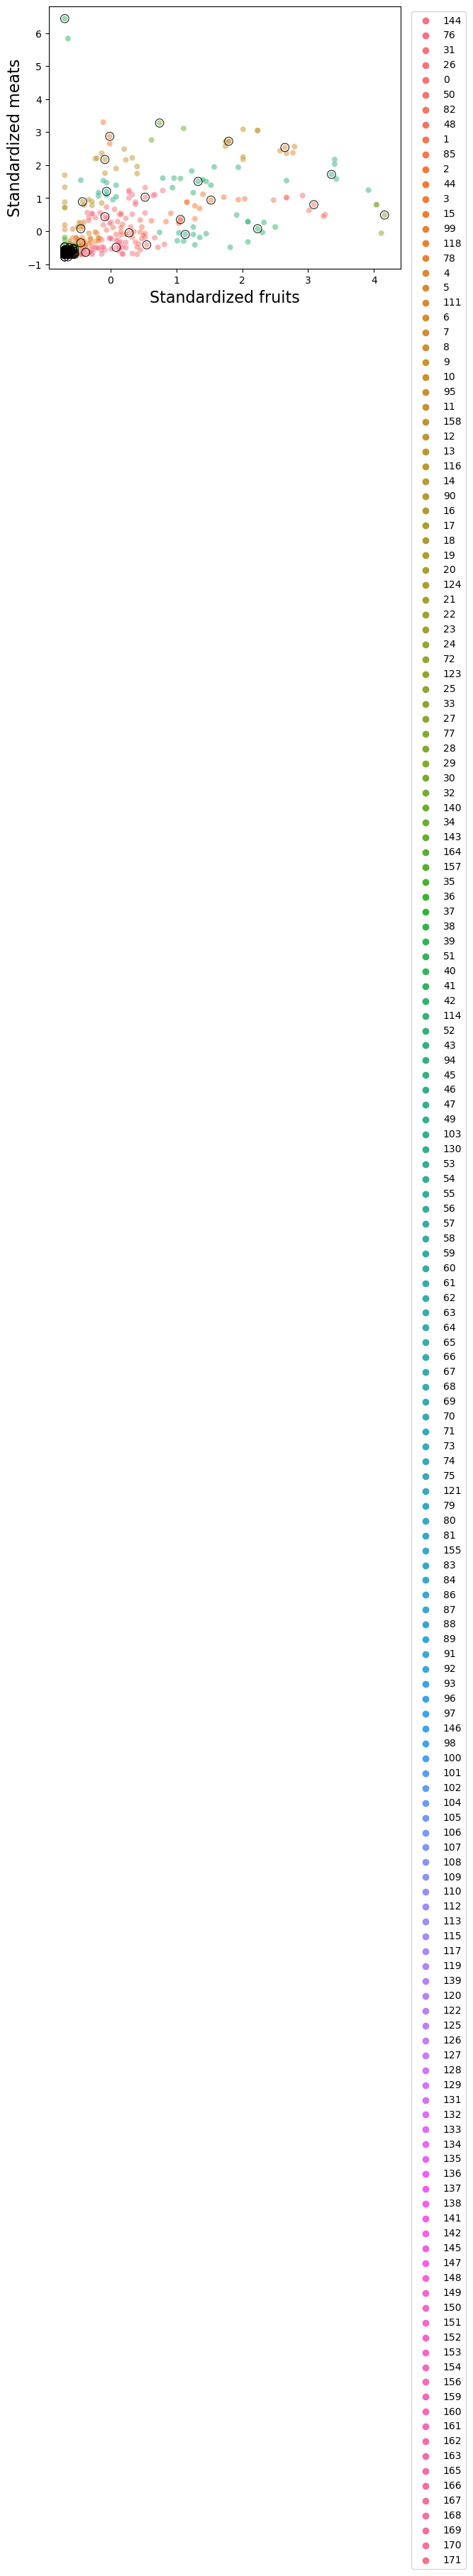

In [8]:
# Plot representative instances
p = sns.scatterplot(x=X[0], y=X[1], alpha=0.5, hue=affinity.labels_.astype(str))
p = sns.scatterplot(x=affinity.cluster_centers_[:, 0],
                    y=affinity.cluster_centers_[:, 1], edgecolor='black', s=70, facecolors='none')
p.set_xlabel('Standardized fruits', fontsize=16)
p.set_ylabel('Standardized meats', fontsize=16)
p.legend(bbox_to_anchor=(1.2, 1))